In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree  import DecisionTreeClassifier,plot_tree 

In [3]:
df=pd.read_csv("product_will_buy.csv")
df

,age,income,student,credit_rating,owns_house,num_purchases,will_buy
0,56,low,no,excellent,yes,3,0
1,46,low,no,fair,yes,1,0
2,32,medium,yes,fair,no,3,0
3,60,medium,yes,fair,yes,4,1
4,25,medium,no,fair,yes,2,0
...,...,...,...,...,...,...,...
795,43,high,no,fair,no,4,1
796,53,low,no,excellent,yes,1,0
797,18,low,no,fair,no,5,1
798,25,medium,no,fair,no,0,1


In [4]:
label=LabelEncoder()
df["income"]=label.fit_transform(df["income"])
df["student"]=label.fit_transform(df["student"])
df["credit_rating"]=label.fit_transform(df["credit_rating"])
df["owns_house"]=label.fit_transform(df["owns_house"])
df


,age,income,student,credit_rating,owns_house,num_purchases,will_buy
0,56,1,0,0,1,3,0
1,46,1,0,1,1,1,0
2,32,2,1,1,0,3,0
3,60,2,1,1,1,4,1
4,25,2,0,1,1,2,0
...,...,...,...,...,...,...,...
795,43,0,0,1,0,4,1
796,53,1,0,0,1,1,0
797,18,1,0,1,0,5,1
798,25,2,0,1,0,0,1


In [5]:
x=df.drop("will_buy",axis=1)
y=df["will_buy"]


In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train

,age,income,student,credit_rating,owns_house,num_purchases
264,37,2,1,1,1,3
615,32,2,0,0,1,7
329,20,2,1,1,1,7
342,50,1,1,1,0,2
394,45,2,1,1,0,5
...,...,...,...,...,...,...
71,57,2,0,1,0,1
106,40,1,0,0,0,3
270,35,2,1,1,1,4
435,40,2,0,1,1,2


In [7]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)


,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [8]:
y_pred=model.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1])

In [9]:
accuracy=accuracy_score(y_pred,y_test)
print(f"accuracy:{accuracy*100:.2f}%")


accuracy:80.62%


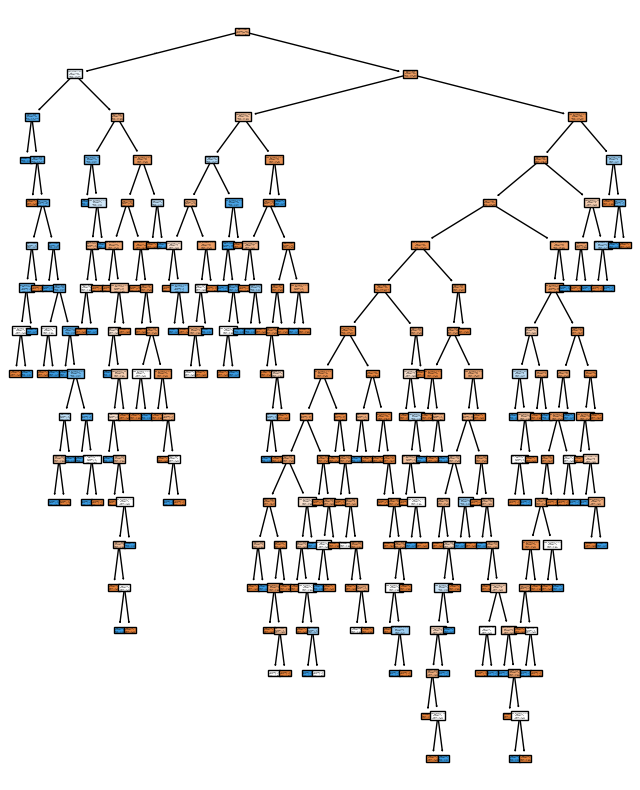

In [10]:
plt.figure(figsize=(8,10))
plot_tree(model,feature_names=["age","income","student","credit_rating","owns_house","num_purchases"],class_names=["no play","play"],filled=True)
plt.show()

In [14]:
data=pd.DataFrame({
    "age":["34"],
    "income":["low"],
    "student":["no"],
    "credit_rating":["excellent"],
    "owns_house":["yes"],
    "num_purchases":["3"]

})
data["age"]=label.fit_transform(data["age"])
data["income"]=label.fit_transform(data["income"])
data["student"]=label.fit_transform(data["student"])
data["credit_rating"]=label.fit_transform(data["credit_rating"])
data["owns_house"]=label.fit_transform(data["owns_house"])
data["num_purchases"]=label.fit_transform(data["num_purchases"])

predict=model.predict(data)
predict




array([1])